<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

In [1]:
# Instalar tensorflow_hub usando pip install tensorflow_hub 
# pip install tensorflow
# pip install matplotlib
# pip install opencv-python
# pip install tensorflow-hub
# pip install -U scikit-learn

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Haz predicciones usando un modelo ya hecho (sin ningún tipo de entrenamiento)**

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

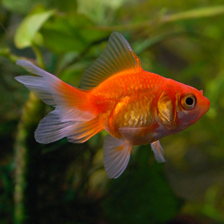

In [4]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
#PAra añadir una entrada y asi poder predecir para cada clase
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Cargar conjunto de datos de flores</h3>

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
#cache_dir indica dónde descargar los datos. especifiqué. lo que significa directorio actual
# untar true lo descomprimirá

In [11]:
os.getcwd()

'C:\\Users\\ACER\\Deep Learning Scripts\\deep-learning-keras-tf-tutorial-master\\18_transfer_learning'

In [21]:
data_dir="datosDEF/Fotos"

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datosDEF/Fotos')

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datosDEF/Fotos/Arboles/img_00003.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00004.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00009.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00010.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00012.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6625


In [26]:
roses = list(data_dir.glob('Arboles/*'))
roses[:5]

[WindowsPath('datosDEF/Fotos/Arboles/img_00003.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00004.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00009.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00010.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00012.jpg')]

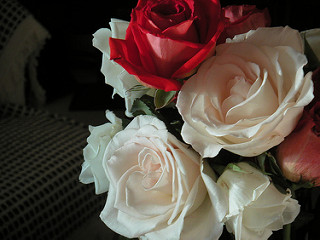

In [17]:
#Image.open(str(roses[1]))

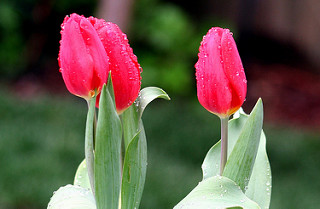

In [18]:
#tulips = list(data_dir.glob('tulips/*'))
#Image.open(str(tulips[0]))

<h3 style='color:purple'>Lea imágenes de flores del disco en una matriz numpy usando opencv</h3>

In [36]:
flowers_images_dict = {
    #'roses': list(data_dir.glob('roses/*')),
    #'daisy': list(data_dir.glob('daisy/*')),
    #'dandelion': list(data_dir.glob('dandelion/*')),
    #'sunflowers': list(data_dir.glob('sunflowers/*')),
    #'tulips': list(data_dir.glob('tulips/*')),
    'Arboles': list(data_dir.glob("Arboles/*")),
    'Deforestacion': list(data_dir.glob("Deforestacion/*")),
}

In [35]:
flowers_labels_dict = {
    #'roses': 0,
    #'daisy': 1,
    #'dandelion': 2,
    #'sunflowers': 3,
    #'tulips': 4,
    'Arboles':0,
    'Deforestacion':1,
}

In [34]:
flowers_images_dict['Arboles'][:5]

[WindowsPath('datosDEF/Fotos/Arboles/img_00003.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00004.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00009.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00010.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00012.jpg')]

In [37]:
str(flowers_images_dict['Deforestacion'][0])

'datosDEF\\Fotos\\Deforestacion\\Captura de pantalla 2022-01-22 143343.png'

In [38]:
img = cv2.imread(str(flowers_images_dict['Arboles'][0]))

In [39]:
img.shape

(256, 256, 3)

In [40]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [41]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [42]:
X = np.array(X)
y = np.array(y)

In [62]:
len(X)

6760

<h3 style='color:purple'>Division de Datos</h3>

In [47]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

<h3 style='color:purple'>Preprocesamiento: escala de imagenes</h3>

In [48]:
X_train_scaled = X_train / 255
#X_test_scaled = X_test / 255
X_val_scaled = X_val / 255

In [49]:
print("Longitud subcojunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
#print("Longitud subconjutno de pruebas: ", len(X_test))

Longitud subcojunto de entrenamiento:  5746
Longitud subconjunto de validación:  1014


**Realice una predicción utilizando un modelo preentrenado en un nuevo conjunto de datos de flores.**

In [50]:
X[0].shape

(224, 224, 3)

In [51]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [52]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

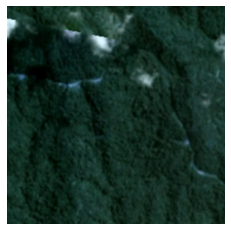

In [53]:
plt.axis('off')
plt.imshow(X[0])

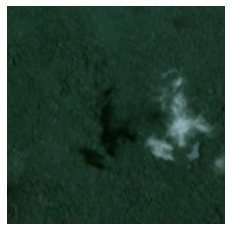

In [54]:
plt.axis('off')
plt.imshow(X[1])

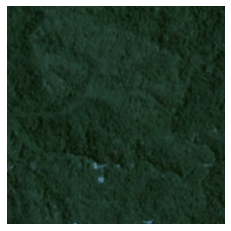

In [55]:
plt.axis('off')
plt.imshow(X[2])

In [56]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795], dtype=int64)

In [ ]:
image_labels[795]

<h3 style='color:purple'>Ahora tome el modelo pre-entrenado y vuelva a entrenarlo usando imágenes de flores.</h3>

In [65]:
from tensorflow.keras.applications import VGG16
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)



pre_trained_model = VGG16(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

In [66]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [67]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(232,activation="relu"),
  tf.keras.layers.Dense(126,activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_of_flowers,activation="sigmoid")
])

#model.summary()
# tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224, 224, 3)),
#  tf.keras.layers.MaxPooling2D(((2,2))),
#  tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
#  tf.keras.layers.MaxPooling2D(((2,2))),

In [68]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(
    X_train_scaled, 
    y_train, epochs=5,
    validation_data=(X_val_scaled,y_val))

Epoch 1/5


C:\Users\ACER\.conda\envs\DLpip\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


180/180 [==============================] - 99s 534ms/step - loss: 0.4358 - acc: 0.8150 - val_loss: 0.3470 - val_acc: 0.8225
Epoch 2/5
180/180 [==============================] - 82s 454ms/step - loss: 0.3433 - acc: 0.8348 - val_loss: 0.3536 - val_acc: 0.8254
Epoch 3/5
180/180 [==============================] - 78s 434ms/step - loss: 0.3291 - acc: 0.8484 - val_loss: 0.3357 - val_acc: 0.8284
Epoch 4/5
180/180 [==============================] - 80s 444ms/step - loss: 0.3228 - acc: 0.8463 - val_loss: 0.3346 - val_acc: 0.8245
Epoch 5/5
180/180 [==============================] - 74s 409ms/step - loss: 0.3134 - acc: 0.8561 - val_loss: 0.3409 - val_acc: 0.8323


In [69]:
# loss: 0.0368 - acc: 0.9881 - val_loss: 0.5889 - val_acc: 0.8802
history.history

{'loss': [0.435844749212265,
  0.34330540895462036,
  0.3290652930736542,
  0.3228147327899933,
  0.31335821747779846],
 'acc': [0.8150017261505127,
  0.8348416090011597,
  0.848416268825531,
  0.8463279008865356,
  0.856073796749115],
 'val_loss': [0.34701603651046753,
  0.3535739481449127,
  0.3357302248477936,
  0.3346328139305115,
  0.3408726155757904],
 'val_acc': [0.8224852085113525,
  0.8254438042640686,
  0.8284023404121399,
  0.824457585811615,
  0.8323471546173096]}

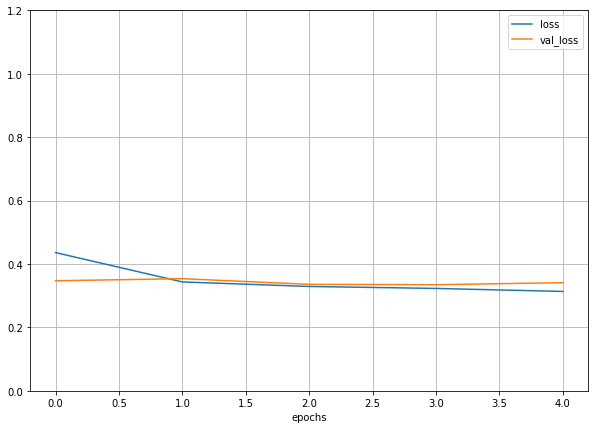

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

In [ ]:
#model.evaluate(X_test_scaled,y_test)
#[0.40989869832992554, 0.8812636137008667]
#[0.08934149891138077, 0.983660101890564]

In [ ]:
gold_fish = Image.open("rosa2.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

In [ ]:
result = model.predict(gold_fish[np.newaxis, ...])
result

In [ ]:
result.shape

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

In [ ]:
names = {
    0: 'roses',
    1: 'daisy',
    2: 'dandelion',
    3: 'sunflowers',
    4: 'tulips',
}

In [ ]:
names[predicted_label_index]